In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()

In [2]:
df = pd.read_csv('Churn_Modelling.csv', index_col = 'RowNumber')
df.head()


,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


We are treating countries with ordinal values(0 < 1 < 2) but they are incomparable.
To solve this we can use one hot encoding.
We will perform some standardization 

In [3]:
geography = pd.get_dummies(df['Geography'],drop_first=True).astype(int)
gender = pd.get_dummies(df['Gender']).astype(int)

df = pd.concat([df,geography,gender], axis = 1)

df = df.drop(['Geography','Gender','Surname','CustomerId'],axis=1)
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Germany,Spain,Female,Male
RowNumber,,,,,,,,,,,,,
1,619,42,2,0.00,1,1,1,101348.88,1,0,0,1,0
2,608,41,1,83807.86,1,0,1,112542.58,0,0,1,1,0
3,502,42,8,159660.80,3,1,0,113931.57,1,0,0,1,0
4,699,39,1,0.00,2,0,0,93826.63,0,0,0,1,0
5,850,43,2,125510.82,1,1,1,79084.10,0,0,1,1,0


In [4]:
X = df.drop('Exited',axis=1)
Y = df['Exited']

In [5]:
from sklearn.preprocessing import StandardScaler
#Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [6]:
print(X[0:10,3])

[-1.22584767  0.11735002  1.33305335 -1.22584767  0.7857279   0.59732859
 -1.22584767  0.61801895  1.05082029  0.93146336]


In [7]:
#Spilt the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0)

In [8]:
#Let us create the Neural Network
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [9]:
#Initialize ANN
classifier = Sequential([
    Dense(6, activation = 'relu', input_shape = (X_train.shape[1],)),
    Dropout(rate = 0.1),
    Dense(6, activation = 'relu'),
    Dropout(rate = 0.1),
    Dense(1, activation = 'sigmoid')
])

/home/sr2m/.local/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [10]:
#Let us take a look at our network
classifier.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 6)              │            78 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 6)              │            42 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             7 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 127 (508.00 B)

 Trainable params: 127 (508.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
#Optimize the weights
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [12]:
#Fitting the Neural Network
history = classifier.fit(X_train, y_train, batch_size = 32, epochs = 80, validation_split = 0.1, verbose = 2)

Epoch 1/80
225/225 - 0s - 2ms/step - accuracy: 0.7551 - loss: 0.5707 - val_accuracy: 0.7950 - val_loss: 0.4887
Epoch 2/80
225/225 - 0s - 391us/step - accuracy: 0.7946 - loss: 0.4916 - val_accuracy: 0.7950 - val_loss: 0.4566
Epoch 3/80
225/225 - 0s - 327us/step - accuracy: 0.7957 - loss: 0.4706 - val_accuracy: 0.7950 - val_loss: 0.4400
Epoch 4/80
225/225 - 0s - 700us/step - accuracy: 0.7960 - loss: 0.4583 - val_accuracy: 0.7950 - val_loss: 0.4308
Epoch 5/80
225/225 - 0s - 609us/step - accuracy: 0.7960 - loss: 0.4505 - val_accuracy: 0.7950 - val_loss: 0.4243
Epoch 6/80
225/225 - 0s - 594us/step - accuracy: 0.7961 - loss: 0.4484 - val_accuracy: 0.7950 - val_loss: 0.4202
Epoch 7/80
225/225 - 0s - 585us/step - accuracy: 0.7961 - loss: 0.4459 - val_accuracy: 0.7950 - val_loss: 0.4169
Epoch 8/80
225/225 - 0s - 608us/step - accuracy: 0.7961 - loss: 0.4399 - val_accuracy: 0.7950 - val_loss: 0.4150
Epoch 9/80
225/225 - 0s - 650us/step - accuracy: 0.7961 - loss: 0.4396 - val_accuracy: 0.7950 - va

In [13]:
y_pred = classifier.predict(X_test)
print(y_pred[:5])

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 353us/step
[[0.2828349 ]
 [0.34884498]
 [0.17538089]
 [0.08751523]
 [0.25473464]]


In [14]:
#Let us use confusion matrix with cutoff value as 0.5
y_pred = (y_pred > 0.5).astype(int)
print(y_pred[:5])

[[0]
 [0]
 [0]
 [0]
 [0]]


[[1562   33]
 [ 290  115]]


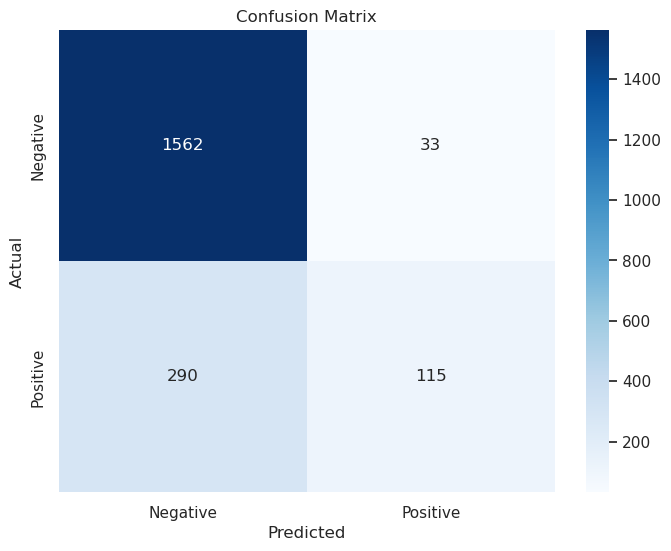

In [15]:
#Making the Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix')
plt.show()

In [16]:
#Accuracy of our NN
print(((cm[0][0] + cm[1][1])* 100) / len(y_test), '% of data was classified correctly')

83.85 % of data was classified correctly
